## County-level population estimates 2017

This notebook looks at county-level population change estimates, which start over with the decennial count each decade, and then are adjusted each year. Each year they add births, subtract deaths, and add the net migration (based on several administrative records such as social security administration data and IRS forms). This method is called the "ADREC" (Administrative record) method, and doesn't involve any shoe-leather work, just looking at administrative records.

The data is used for adjusting grant money and other population-based policy-making, so the overall accuracy is pretty good (see bullet 2 under Methodology right below) at keeping the decennial numbers from getting too stale. The way they measured accuracy is by comparing the estimates from the decade before to the actual decennial counts in 2000 and 2010. 

But overall accuracy was still around 1-4-ish-percent at different levels. So if you just want to know the population in one little 100,000-person county, and the swing is only a hundred people in either direction, it's still going to be within that accuracy range. 

If you want to look at it from a newsy perspective, stick to broad strokes, giant changes, or look at the component parts, especially the vitals -- are births way outnumbering deaths?

#### General info
* About the population estimates (PEP): https://www.census.gov/programs-surveys/popest/about.html
* Schedule of Census Bureau PEP releases: https://www.census.gov/programs-surveys/popest/about/schedule.html

#### Methodology
* Methodology for population estimates 2017: https://www2.census.gov/programs-surveys/popest/technical-documentation/methodology/2010-2017/2017-natstcopr-meth.pdf
* Info on accuracy of the population estimates: https://www.census.gov/population/www/documentation/twps0100/E2%20County%20Totals_FINAL.pdf
* Release notes for 2017: https://www2.census.gov/programs-surveys/popest/technical-documentation/methodology/2010-2017/2017-est-relnotes.pdf



In [107]:
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt


In [108]:
change_df = pd.read_csv("data/PEP_2017_PEPANNRES/PEP_2017_PEPANNRES_with_ann.csv",skiprows=1)
change_df.head()

,Id,Id2,Geography,"April 1, 2010 - Census","April 1, 2010 - Estimates Base",Population Estimate (as of July 1) - 2010,Population Estimate (as of July 1) - 2011,Population Estimate (as of July 1) - 2012,Population Estimate (as of July 1) - 2013,Population Estimate (as of July 1) - 2014,Population Estimate (as of July 1) - 2015,Population Estimate (as of July 1) - 2016,Population Estimate (as of July 1) - 2017
0,0500000US01001,1001,"Autauga County, Alabama",54571,54571,54750,55199,54927,54695,54864,54838,55278,55504
1,0500000US01003,1003,"Baldwin County, Alabama",182265,182265,183110,186534,190048,194736,199064,202863,207509,212628
2,0500000US01005,1005,"Barbour County, Alabama",27457,27457,27332,27351,27175,26947,26749,26264,25774,25270
3,0500000US01007,1007,"Bibb County, Alabama",22915,22919,22872,22745,22658,22503,22533,22561,22633,22668
4,0500000US01009,1009,"Blount County, Alabama",57322,57324,57381,57562,57595,57623,57546,57590,57562,58013


In [109]:
comp_df = pd.read_csv("data/PEP_2017_PEPTCOMP/PEP_2017_PEPTCOMP_with_ann.csv",skiprows=1)
comp_df.head()

,Id,Id2,Geography,"Cumulative Estimates of the Components of Population Change - April 1, 2010 to July 1, 2017 - Total Population Change [1]","Cumulative Estimates of the Components of Population Change - April 1, 2010 to July 1, 2017 - Natural Increase","Cumulative Estimates of the Components of Population Change - April 1, 2010 to July 1, 2017 - Vital Events - Births","Cumulative Estimates of the Components of Population Change - April 1, 2010 to July 1, 2017 - Vital Events - Deaths","Cumulative Estimates of the Components of Population Change - April 1, 2010 to July 1, 2017 - Net Migration - Total","Cumulative Estimates of the Components of Population Change - April 1, 2010 to July 1, 2017 - Net Migration - International [2]","Cumulative Estimates of the Components of Population Change - April 1, 2010 to July 1, 2017 - Net Migration - Domestic","Annual Estimates of the Components of Population Change - July 1, 2016 to July 1, 2017 - Total Population Change [1]","Annual Estimates of the Components of Population Change - July 1, 2016 to July 1, 2017 - Natural Increase","Annual Estimates of the Components of Population Change - July 1, 2016 to July 1, 2017 - Vital Events - Births","Annual Estimates of the Components of Population Change - July 1, 2016 to July 1, 2017 - Vital Events - Deaths","Annual Estimates of the Components of Population Change - July 1, 2016 to July 1, 2017 - Net Migration - Total","Annual Estimates of the Components of Population Change - July 1, 2016 to July 1, 2017 - Net Migration - International [2]","Annual Estimates of the Components of Population Change - July 1, 2016 to July 1, 2017 - Net Migration - Domestic"
0,0500000US01001,1001,"Autauga County, Alabama",933,616,4593,3977,317,71,246,226,154,664,510,73,15,58
1,0500000US01003,1003,"Baldwin County, Alabama",30363,1712,16068,14356,28263,1156,27107,5119,235,2325,2090,4866,164,4702
2,0500000US01005,1005,"Barbour County, Alabama",-2187,-164,2065,2229,-2031,-46,-1985,-504,-16,270,286,-489,-3,-486
3,0500000US01007,1007,"Bibb County, Alabama",-251,97,1879,1782,-342,116,-458,35,37,270,233,0,20,-20
4,0500000US01009,1009,"Blount County, Alabama",689,564,4980,4416,171,286,-115,451,32,685,653,421,62,359


### Check against numbers in press release

The release says

"**Maricopa County, Ariz., saw a population increase of nearly 74,000** — the most of any county last year — according to the U.S. Census Bureau’s July 1, 2017, population estimates released today. The statistics provide population estimates and components of change for the nation’s 382 metropolitan statistical areas, 551 micropolitan statistical areas and **3,142 counties**."

Let's check that Maricopa grew that much, and then and that there are 3142 counties





In [110]:
maricopa = change_df[change_df["Geography"] == "Maricopa County, Arizona"]
maricopa["Population Estimate (as of July 1) - 2017"] - maricopa["Population Estimate (as of July 1) - 2016"]

103    73650
dtype: int64

Above looks good. Let's also check that it was the most...

In [111]:
change_df["2017 change"] = change_df["Population Estimate (as of July 1) - 2017"]\
- change_df["Population Estimate (as of July 1) - 2016"]

change_df["Since 2010 change"] = change_df["Population Estimate (as of July 1) - 2017"]\
- change_df["April 1, 2010 - Estimates Base"]

change_df.sort_values(by="2017 change",ascending=False).head(3)

,Id,Id2,Geography,"April 1, 2010 - Census","April 1, 2010 - Estimates Base",Population Estimate (as of July 1) - 2010,Population Estimate (as of July 1) - 2011,Population Estimate (as of July 1) - 2012,Population Estimate (as of July 1) - 2013,Population Estimate (as of July 1) - 2014,Population Estimate (as of July 1) - 2015,Population Estimate (as of July 1) - 2016,Population Estimate (as of July 1) - 2017,2017 change,Since 2010 change
103,0500000US04013,4013,"Maricopa County, Arizona",3817117,3817361,3824644,3869626,3939776,4006307,4076708,4154076,4233383,4307033,73650,489672
1748,0500000US32003,32003,"Clark County, Nevada",1951269,1951269,1952906,1966521,1996290,2026056,2064991,2110330,2156724,2204079,47355,252810
218,0500000US06065,6065,"Riverside County, California",2189641,2189753,2202001,2235890,2264804,2291406,2321738,2352080,2386522,2423266,36744,233513


Looks good again. Let's count the records

In [112]:
len(change_df)

3142

OK, this is the right data set.

### Make a state column

In [113]:
def state(geostr):
    return geostr.split(", ")[1]

def county(geostr):
    return geostr.split(", ")[0]


change_df["state"] = change_df["Geography"].apply(state)
change_df["county"] = change_df["Geography"].apply(county)

In [114]:
ct_change = change_df[change_df["state"] == "Connecticut"]
ct_change

,Id,Id2,Geography,"April 1, 2010 - Census","April 1, 2010 - Estimates Base",Population Estimate (as of July 1) - 2010,Population Estimate (as of July 1) - 2011,Population Estimate (as of July 1) - 2012,Population Estimate (as of July 1) - 2013,Population Estimate (as of July 1) - 2014,Population Estimate (as of July 1) - 2015,Population Estimate (as of July 1) - 2016,Population Estimate (as of July 1) - 2017,2017 change,Since 2010 change,state,county
308,0500000US09001,9001,"Fairfield County, Connecticut",916829,916846,919749,929398,936345,942865,946547,948116,949191,949921,730,33075,Connecticut,Fairfield County
309,0500000US09003,9003,"Hartford County, Connecticut",894014,894031,895504,897778,898572,899765,898810,897626,895497,895388,-109,1357,Connecticut,Hartford County
310,0500000US09005,9005,"Litchfield County, Connecticut",189927,189926,189829,189076,187685,187062,185585,184349,183097,182177,-920,-7749,Connecticut,Litchfield County
311,0500000US09007,9007,"Middlesex County, Connecticut",165676,165676,165625,166265,165519,165293,164717,163698,163433,163410,-23,-2266,Connecticut,Middlesex County
312,0500000US09009,9009,"New Haven County, Connecticut",862477,862462,863618,864725,865335,864558,864073,861594,859973,860435,462,-2027,Connecticut,New Haven County
313,0500000US09011,9011,"New London County, Connecticut",274055,274059,274036,273226,274280,273388,271864,270266,269307,269033,-274,-5026,Connecticut,New London County
314,0500000US09013,9013,"Tolland County, Connecticut",152691,152691,153214,153063,151973,151908,151748,151717,151145,151461,316,-1230,Connecticut,Tolland County
315,0500000US09015,9015,"Windham County, Connecticut",118428,118423,118596,118396,117996,117631,116844,116496,116042,116359,317,-2064,Connecticut,Windham County


In [115]:
ct_change[["Geography","2017 change"]]

,Geography,2017 change
308,"Fairfield County, Connecticut",730
309,"Hartford County, Connecticut",-109
310,"Litchfield County, Connecticut",-920
311,"Middlesex County, Connecticut",-23
312,"New Haven County, Connecticut",462
313,"New London County, Connecticut",-274
314,"Tolland County, Connecticut",316
315,"Windham County, Connecticut",317


In [116]:
ct_change[["Geography","Since 2010 change"]]

,Geography,Since 2010 change
308,"Fairfield County, Connecticut",33075
309,"Hartford County, Connecticut",1357
310,"Litchfield County, Connecticut",-7749
311,"Middlesex County, Connecticut",-2266
312,"New Haven County, Connecticut",-2027
313,"New London County, Connecticut",-5026
314,"Tolland County, Connecticut",-1230
315,"Windham County, Connecticut",-2064


In [117]:
# Let's get just the population estimates

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


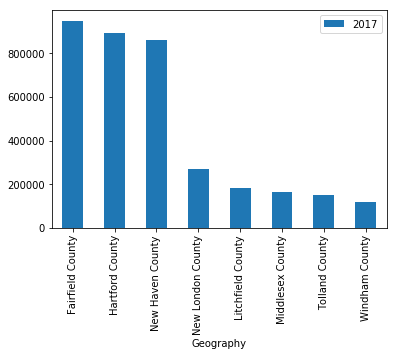

In [177]:
ct_pop_cols = filter(lambda x: "Population" in x, ct_change.columns)
ct_pop_cols = ["Geography"] + ct_pop_cols
ct_pop = ct_change[ct_pop_cols]


ct_pop_cols = map(lambda x: x.replace("Population Estimate (as of July 1) - ",""), ct_pop_cols)
ct_pop.columns = ct_pop_cols
ct_pop["Geography"] = ct_pop["Geography"].apply(lambda x: str(x).replace(", Connecticut",""))
ct_pop.set_index("Geography")[["2017"]].sort_values(by="2017",ascending=False).plot.bar()

In [173]:
print ct_pop.set_index("Geography")[["2017"]].sort_values(by="2017",ascending=False).to_csv(sep="\t")

Geography	2017
Fairfield County	949921
Hartford County	895388
New Haven County	860435
New London County	269033
Litchfield County	182177
Middlesex County	163410
Tolland County	151461
Windham County	116359



In [164]:
ct_pop_pct = ct_pop.copy()
keep_cols = ["2010"]

for c in range(2011,2018):

    c = str(c)
    keep_cols.append(c)
    ct_pop_pct[c] = (ct_pop_pct[c] / ct_pop_pct["2010"]) * 100
    
ct_pop_pct["2010"] = 100
ct_pop_pct = ct_pop_pct.set_index("Geography")[keep_cols]
ct_pop_pct.index = ct_pop_pct.index.map(lambda x: str(x).replace(", Connecticut",""))
ct_pop_pct

,2010,2011,2012,2013,2014,2015,2016,2017
Fairfield County,100,101.049091,101.804405,102.513294,102.913621,103.084211,103.201091,103.280460
Hartford County,100,100.253935,100.342600,100.475821,100.369178,100.236962,99.999218,99.987046
Litchfield County,100,99.603327,98.870562,98.542372,97.764304,97.113191,96.453650,95.969004
Middlesex County,100,100.386415,99.936000,99.799547,99.451774,98.836528,98.676528,98.662642
New Haven County,100,100.128182,100.198815,100.108844,100.052685,99.765637,99.577938,99.631434
New London County,100,99.704418,100.089039,99.763535,99.207403,98.624268,98.274314,98.174327
Tolland County,100,99.901445,99.190022,99.147597,99.043168,99.022935,98.649601,98.855849
Windham County,100,99.831360,99.494081,99.186313,98.522716,98.229283,97.846470,98.113764


In [147]:
print (ct_pop_pct.transpose().to_csv(sep="\t",float_format='%.2f'))

	Fairfield County	Hartford County	Litchfield County	Middlesex County	New Haven County	New London County	Tolland County	Windham County
2010	100.00	100.00	100.00	100.00	100.00	100.00	100.00	100.00
2011	101.05	100.25	99.60	100.39	100.13	99.70	99.90	99.83
2012	101.80	100.34	98.87	99.94	100.20	100.09	99.19	99.49
2013	102.51	100.48	98.54	99.80	100.11	99.76	99.15	99.19
2014	102.91	100.37	97.76	99.45	100.05	99.21	99.04	98.52
2015	103.08	100.24	97.11	98.84	99.77	98.62	99.02	98.23
2016	103.20	100.00	96.45	98.68	99.58	98.27	98.65	97.85
2017	103.28	99.99	95.97	98.66	99.63	98.17	98.86	98.11



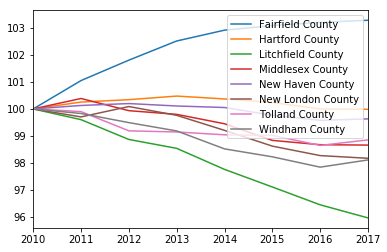

In [148]:
ct_pop_pct.transpose().plot()

## Part 2, components of changes

In [149]:
cols = map(lambda x: x.replace('Cumulative Estimates of the Components of Population Change - ',""),ct_comp.columns)
cols = map(lambda x: x.replace('Annual Estimates of the Components of Population Change - ',""),cols)
cols = map(lambda x: x.replace(' to July 1, 2017',""),cols)
ct_comp.columns = cols
cols

['Id',
 'Id2',
 'Geography',
 'April 1, 2010 - Total Population Change [1]',
 'April 1, 2010 - Natural Increase',
 'April 1, 2010 - Vital Events - Births',
 'April 1, 2010 - Vital Events - Deaths',
 'April 1, 2010 - Net Migration - Total',
 'April 1, 2010 - Net Migration - International [2]',
 'April 1, 2010 - Net Migration - Domestic',
 'July 1, 2016 - Total Population Change [1]',
 'July 1, 2016 - Natural Increase',
 'July 1, 2016 - Vital Events - Births',
 'July 1, 2016 - Vital Events - Deaths',
 'July 1, 2016 - Net Migration - Total',
 'July 1, 2016 - Net Migration - International [2]',
 'July 1, 2016 - Net Migration - Domestic']

In [150]:
ct_comp_since_2010_cols = ["Geography"] + filter(lambda x: "2010" in x, cols)
ct_comp_since_2010_cols
ct_comp_since_2010 = ct_comp[ct_comp_since_2010_cols]
ct_comp_since_2010

,Geography,"April 1, 2010 - Total Population Change [1]","April 1, 2010 - Natural Increase","April 1, 2010 - Vital Events - Births","April 1, 2010 - Vital Events - Deaths","April 1, 2010 - Net Migration - Total","April 1, 2010 - Net Migration - International [2]","April 1, 2010 - Net Migration - Domestic"
308,"Fairfield County, Connecticut",33075,25684,73454,47770,7582,41711,-34129
309,"Hartford County, Connecticut",1357,10923,68198,57275,-9634,33983,-43617
310,"Litchfield County, Connecticut",-7749,-2180,10589,12769,-5572,2005,-7577
311,"Middlesex County, Connecticut",-2266,-488,10152,10640,-1703,2426,-4129
312,"New Haven County, Connecticut",-2027,9241,64732,55491,-11253,28377,-39630
313,"New London County, Connecticut",-5026,2266,19518,17252,-7365,6539,-13904
314,"Tolland County, Connecticut",-1230,1046,8286,7240,-2345,2915,-5260
315,"Windham County, Connecticut",-2064,944,8190,7246,-3038,1992,-5030


In [141]:
ct_comp_since_2016_cols = ["Geography"] + filter(lambda x: "2016" in x, cols)
ct_comp_since_2016 = ct_comp[ct_comp_since_2016_cols]
#cols = map(lambda x: x.replace('July 1, 2016 - ',""),ct_comp_since_2016_cols)
#ct_comp_since_2016.columns = cols
ct_comp_since_2016

,Geography,"July 1, 2016 - Total Population Change [1]","July 1, 2016 - Natural Increase","July 1, 2016 - Vital Events - Births","July 1, 2016 - Vital Events - Deaths","July 1, 2016 - Net Migration - Total","July 1, 2016 - Net Migration - International [2]","July 1, 2016 - Net Migration - Domestic"
308,"Fairfield County, Connecticut",730,3147,9921,6774,-2472,6218,-8690
309,"Hartford County, Connecticut",-109,1044,9107,8063,-1177,5049,-6226
310,"Litchfield County, Connecticut",-920,-349,1423,1772,-569,337,-906
311,"Middlesex County, Connecticut",-23,-126,1321,1447,109,349,-240
312,"New Haven County, Connecticut",462,1015,8650,7635,-564,4323,-4887
313,"New London County, Connecticut",-274,43,2564,2521,-314,720,-1034
314,"Tolland County, Connecticut",316,115,1119,1004,202,459,-257
315,"Windham County, Connecticut",317,49,1078,1029,273,303,-30
